# Hanoi Weather Data - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on Hanoi weather data to understand patterns, trends, and relationships that will inform our temperature forecasting model.

## Objectives
1. Load and understand the dataset structure
2. Analyze data quality and missing values
3. Explore temperature patterns and seasonality
4. Investigate relationships between weather variables
5. Identify potential features for forecasting
6. Visualize key insights and trends


### Setup and Imports

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

## **1. Data Overview**

### 1.1. Load & Basic Info

**Data Dictionary**

Weather Data Elements for Hanoi (Daily, Metric Units)

This table outlines the weather data elements for Hanoi, Vietnam, using the metric unit group (°C, mm, cm, km) for daily aggregations. Data is sourced from the Timeline Weather API, with measurements recorded at standard heights (e.g., temperature at 2 meters above ground, wind speed at 10 meters). Each element includes its meaning and values (units or data type). The local timezone for Hanoi is UTC+07:00. The current date and time are Monday, October 13, 2025, 11:28 PM UTC+07:00.


| **Feature Name**     | **Meaning**                                                                                                            | **(unit) Values**                                                                     |
|----------------------|-----------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| **name**             | Name of the location, indicating the city or region for which the weather data is recorded.                            | String (e.g., "Hanoi")                                                                |
| **datetime**         | Date of the daily weather record in the local timezone (Hanoi: UTC+07:00).                                             | ISO 8601 format (e.g., "2025-10-13") (string)                                         |
| **tempmax**          | Maximum temperature recorded for the day, measured 2 meters above ground.                                              | °C (numeric)                                                                          |
| **tempmin**          | Minimum temperature recorded for the day, measured 2 meters above ground.                                              | °C (numeric)                                                                          |
| **temp**             | Mean (average) temperature for the day, calculated from hourly values.                                                 | °C (numeric)                                                                          |
| **feelslikemax**     | Maximum “feels like” temperature for the day, combining heat index (temperature >26.7°C, humidity >40%) or wind chill (temperature <10°C, wind speed >5 kph). | °C (numeric)                                                                          |
| **feelslikemin**     | Minimum “feels like” temperature for the day, based on heat index or wind chill.                                       | °C (numeric)                                                                          |
| **feelslike**        | Mean “feels like” temperature for the day, averaged from hourly values.                                                | °C (numeric)                                                                          |
| **dew**              | Dew point temperature, indicating when air reaches 100% humidity.                                                      | °C (numeric)                                                                          |
| **humidity**         | Relative humidity, the ratio of water vapor to the maximum possible at the given temperature, averaged for the day.    | % (numeric, 0–100)                                                                    |
| **precip**           | Total precipitation (rain, snow, etc.) that fell or is predicted to fall during the day, summed from hourly values.     | mm (numeric)                                                                          |
| **precipprob**       | Maximum probability of precipitation for the day, based on hourly percentage chances.                                  | % (numeric, 0–100)                                                                    |
| **precipcover**      | Proportion of time with measurable precipitation during the day (e.g., 6 hours of rain in a day = 25%).                | % (numeric, 0–100)                                                                    |
| **preciptype**       | Types of precipitation recorded or predicted for the day, aggregated from hourly values.                               | List of: "rain", "snow", "freezing rain", "ice" (categorical)                         |
| **snow**             | Total new snow that fell during the day, summed from hourly values.                                                    | cm (numeric)                                                                          |
| **snowdepth**        | Average snow depth on the ground during the day, maximum of hourly values.                                             | cm (numeric)                                                                          |
| **windgust**         | Maximum wind gust (short-term wind speed, typically <20 seconds) during the day, recorded if >18 kph above mean.       | kph (numeric, null if criteria not met)                                               |
| **windspeed**        | Maximum wind speed for the day, measured 10 meters above ground, from hourly averages over 2-minute periods.           | kph (numeric)                                                                         |
| **winddir**          | Wind direction from which the wind blows, in degrees (0° = North, 90° = East, 180° = South, 270° = West).              | Degrees (numeric, 0–360)                                                              |
| **sealevelpressure** | Atmospheric pressure adjusted to sea level, averaged from hourly values.                                               | mb (numeric)                                                                          |
| **cloudcover**       | Percentage of sky covered by clouds at all altitudes, averaged from hourly values.                                     | % (numeric, 0–100)                                                                    |
| **visibility**       | Distance visible in daylight, accounting for haze, mist, fog, or smoke, averaged from hourly values.                   | km (numeric)                                                                          |
| **solarradiation**   | Average solar radiation power during the day, measured in watts per square meter.                                      | W/m² (numeric)                                                                        |
| **solarenergy**      | Total solar energy accumulated during the day, summed from hourly values.                                              | MJ/m² (numeric)                                                                       |
| **uvindex**          | Maximum UV radiation exposure index for the day, based on cloud cover, time, and altitude.                             | Integer (0–10)                                                                        |
| **severerisk**       | Indicator of severe weather risk (e.g., storms, typhoons).                                                             | Numeric (0–10) or categorical ("low", "medium", "high")                               |
| **sunrise**          | Local time of sunrise for the day.                                                                                    | Local time (string, e.g., "06:00")                                                    |
| **sunset**           | Local time of sunset for the day.                                                                                     | Local time (string, e.g., "18:00")                                                    |
| **moonphase**        | Decimal value representing the moon phase (0 = New Moon, 0.25 = First Quarter, 0.5 = Full Moon, 0.75 = Last Quarter). | Numeric (0–1)                                                                         |
| **conditions**       | Short text summary of notable weather conditions for the day, dependent on station data.                               | Categorical (e.g., "Clear", "Partly Cloudy", "Rain")                                  |
| **description**      | Detailed human-readable description of the day’s weather, translatable via the `lang` API parameter.                   | String (e.g., "Partly cloudy with a chance of rain")                                  |
| **icon**             | Text code for selecting a weather icon, compatible with icon sets in the Weather API.                                  | Categorical (e.g., "clear-day", "rain", "partly-cloudy-day")                          |
| **stations**         | List or ID of weather stations providing data for the day.                                                             | String or list (e.g., "VHHH, RVHN")                                                   |

#### Notes
- The **(unit) Values** column specifies the units (e.g., °C, mm, kph) or data type (e.g., string, numeric, categorical) for each element.
- Daily aggregations are derived from hourly data (e.g., `tempmax` is the maximum of hourly temperatures, `precip` is the sum of hourly precipitation).

In [465]:
# Load the daily weather data
df = pd.read_csv('../data/daily/daily_data.csv')

# Basic information about the dataset
print("HANOI WEATHER DATASET OVERVIEW:")
print(f"Dataset Shape: {df.shape}")
print(f"Records: {df.shape[0]:,} days")
print(f"Features: {df.shape[1]} variables")
print(f"Location: {df['name'].iloc[0]}")

# Date range
df['datetime'] = pd.to_datetime(df['datetime'])
print(f"Date Range: {df['datetime'].min().date()} to {df['datetime'].max().date()}")
print(f"Total Years: {(df['datetime'].max() - df['datetime'].min()).days / 365.25:.1f}")

HANOI WEATHER DATASET OVERVIEW:
Dataset Shape: (3654, 33)
Records: 3,654 days
Features: 33 variables
Location: Hanoi
Date Range: 2015-10-01 to 2025-10-01
Total Years: 10.0


In [466]:
# Display first few rows and column information
print("FIRST 5 RECORDS:")
print(df.head())

FIRST 5 RECORDS:
    name   datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  Hanoi 2015-10-01     34.1     24.0  29.6          39.7          24.0   
1  Hanoi 2015-10-02     32.1     24.5  27.6          36.6          24.5   
2  Hanoi 2015-10-03     32.1     25.7  28.6          37.5          25.7   
3  Hanoi 2015-10-04     32.0     25.5  28.9          35.8          25.5   
4  Hanoi 2015-10-05     31.2     24.0  27.4          36.1          24.0   

   feelslike   dew  humidity  precip  precipprob  precipcover preciptype  \
0       34.3  24.1      73.8    5.60         100        29.17       rain   
1       30.2  23.6      79.9   11.14         100        12.50       rain   
2       31.6  23.8      76.7    0.11         100         4.17       rain   
3       31.2  22.1      68.2    2.40         100         8.33       rain   
4       28.8  20.9      68.1    0.00           0         0.00        NaN   

   snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  \
0    

In [467]:
print("DATASET INFO:")
print(df.info())

DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              3654 non-null   object        
 1   datetime          3654 non-null   datetime64[ns]
 2   tempmax           3654 non-null   float64       
 3   tempmin           3654 non-null   float64       
 4   temp              3654 non-null   float64       
 5   feelslikemax      3654 non-null   float64       
 6   feelslikemin      3654 non-null   float64       
 7   feelslike         3654 non-null   float64       
 8   dew               3654 non-null   float64       
 9   humidity          3654 non-null   float64       
 10  precip            3654 non-null   float64       
 11  precipprob        3654 non-null   int64         
 12  precipcover       3654 non-null   float64       
 13  preciptype        2667 non-null   object        
 14  snow      

### 1.2. Data Quality Report

In [468]:
def data_quality_report(df):
    report = {
        'Total Samples': len(df),
        'Total Features': len(df.columns),
        'Duplicate Rows': df.duplicated().sum(),
        'Memory Usage (MB)': f"{(df.memory_usage(deep=True).sum() / 1024**2):.2f}"
    }

    # Data types summary
    dtype_summary = df.dtypes.value_counts()

    return report, dtype_summary

quality_report, dtype_summary = data_quality_report(df)
print("Data Quality Report:")
for key, value in quality_report.items():
    print(f"{key}: {value}")

print("\nData Types Summary:")
print(dtype_summary)

Data Quality Report:
Total Samples: 3654
Total Features: 33
Duplicate Rows: 0
Memory Usage (MB): 2.65

Data Types Summary:
float64           20
object             8
int64              4
datetime64[ns]     1
Name: count, dtype: int64


### 1.3. Summary Statistics

In [469]:
print(df.describe(include='all'))  # numeric + object columns

         name             datetime  tempmax  tempmin     temp  feelslikemax  \
count    3654                 3654  3654.00  3654.00  3654.00       3654.00   
unique      1                  NaN      NaN      NaN      NaN           NaN   
top     Hanoi                  NaN      NaN      NaN      NaN           NaN   
freq     3654                  NaN      NaN      NaN      NaN           NaN   
mean      NaN  2020-09-30 12:00:00    28.45    21.87    24.83         32.52   
min       NaN  2015-10-01 00:00:00     8.00     5.90     7.00          8.00   
25%       NaN  2018-04-01 06:00:00    24.10    18.00    21.00         24.10   
50%       NaN  2020-09-30 12:00:00    29.30    23.00    26.00         32.60   
75%       NaN  2023-04-01 18:00:00    33.00    26.00    28.90         41.10   
max       NaN  2025-10-01 00:00:00    41.90    31.00    35.50         52.50   
std       NaN                  NaN     5.81     4.86     5.11          9.52   

        feelslikemin  feelslike      dew  humidity 

Initial Recommendation:

- Convert datetime columns: `datetime`, `sunrise`, `sunset`

- Remove columns that do not provide meaningful value, including `icon`, `stations`, and `conditions`.

In [470]:
for col in ['sunrise', 'sunset']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
df = df.drop(columns=["icon", "stations", "conditions", "description"])

## **2. Missing Values, Constant Features and Outliers**

### 2.1. Checking columns with only one unique value

In [471]:
# Select columns with only one unique value
single_value_cols = df.columns[df.nunique() == 1]
print(f"Number of columns with a single unique value: {len(single_value_cols)}")
print(f"Number of columns with a single unique value are: {[x for x in single_value_cols]}")

Number of columns with a single unique value: 4
Number of columns with a single unique value are: ['name', 'preciptype', 'snow', 'snowdepth']


### 2.2. Checking missing values and duplicates

In [472]:
print("MISSING VALUES ANALYSIS:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

print(f"\nDUPLICATE RECORDS: {df.duplicated().sum()}")


MISSING VALUES ANALYSIS:
            Missing Count  Percentage
preciptype            987       27.01
severerisk           2654       72.63

DUPLICATE RECORDS: 0


Recommendation:

- Remove single-value features: `name`, `preciptype`, `snow`, `snowdepth`.

- Remove unnecessary features with high missing rates (>70%): `severerisk`.

In [473]:
df = df.drop(columns=['name', 'preciptype', 'snow', 'snowdepth', 'severerisk'])

### 2.3. Outlier Detection & Analysis

OUTLIER ANALYSIS SUMMARY:
temp           :    3 outliers (0.1%)
humidity       :   86 outliers (2.4%)
precip         :  599 outliers (16.4%)
windspeed      :   43 outliers (1.2%)


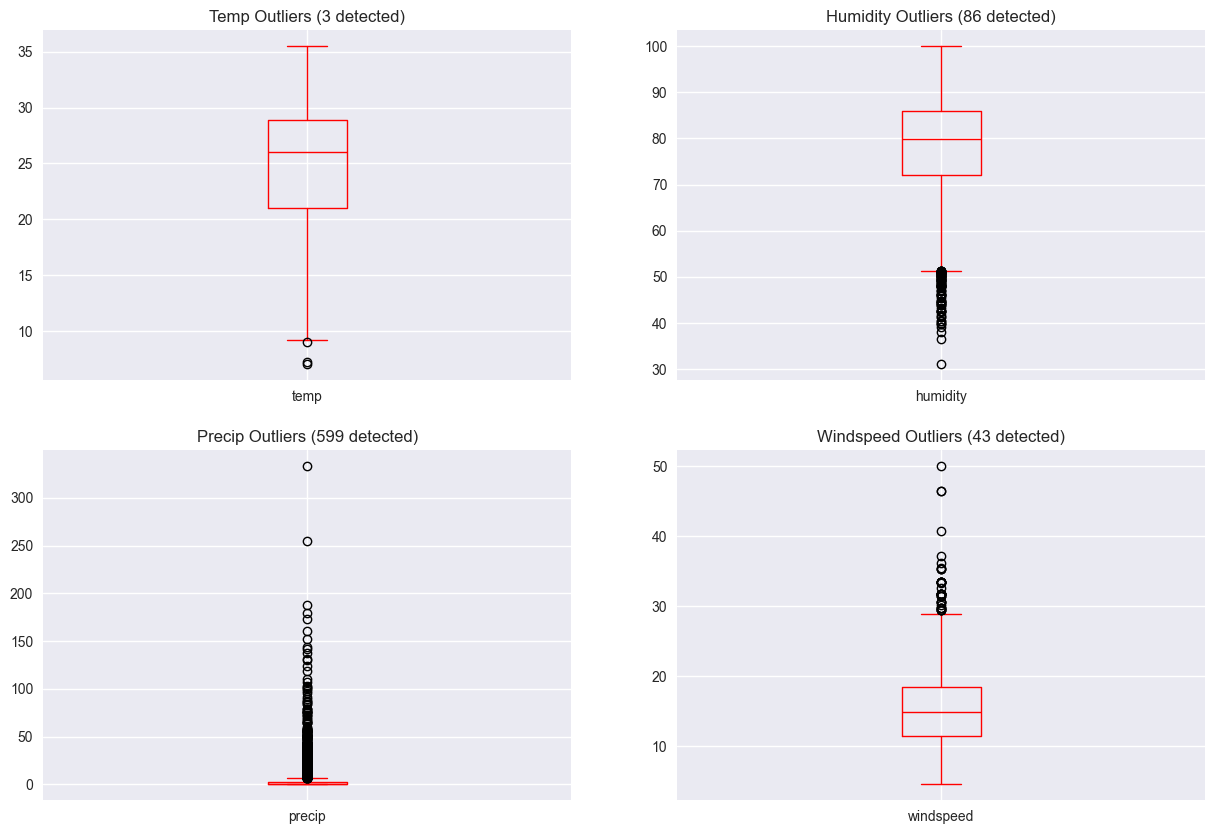

In [474]:
# Outlier detection using IQR and visualization
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
variables = ['temp', 'humidity', 'precip', 'windspeed']
for i, var in enumerate(variables):
    row, col = i // 2, i % 2
    outliers, lower, upper = detect_outliers(df, var)
    
    # Box plot
    df.boxplot(column=var, ax=axes[row, col], color='r')
    axes[row, col].set_title(f'{var.title()} Outliers ({len(outliers)} detected)')
    
print("OUTLIER ANALYSIS SUMMARY:")
for var in variables:
    outliers, _, _ = detect_outliers(df, var)
    print(f"{var:15}: {len(outliers):4d} outliers ({len(outliers)/len(df)*100:.1f}%)")

Nothing to be concerned about regarding these types features 

## **3. Univariate Analysis**

In [475]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
print(f"Numbers of numerical columns: {len(numeric_cols)}")
print(f"Numbers of categorical columns: {len(cat_cols)}")

Numbers of numerical columns: 21
Numbers of categorical columns: 0


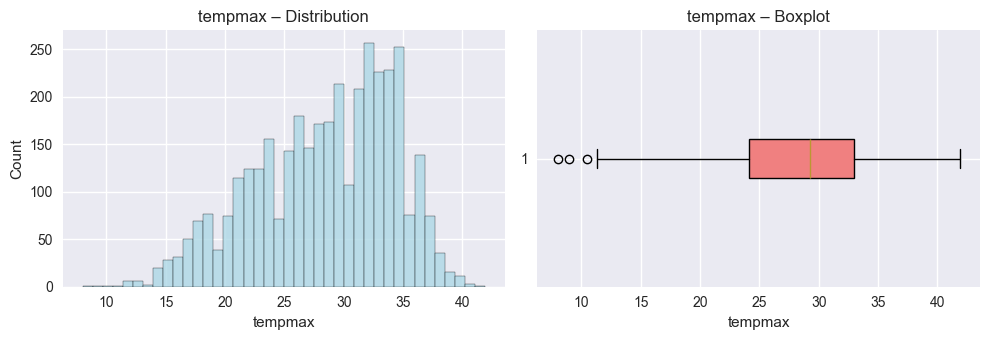

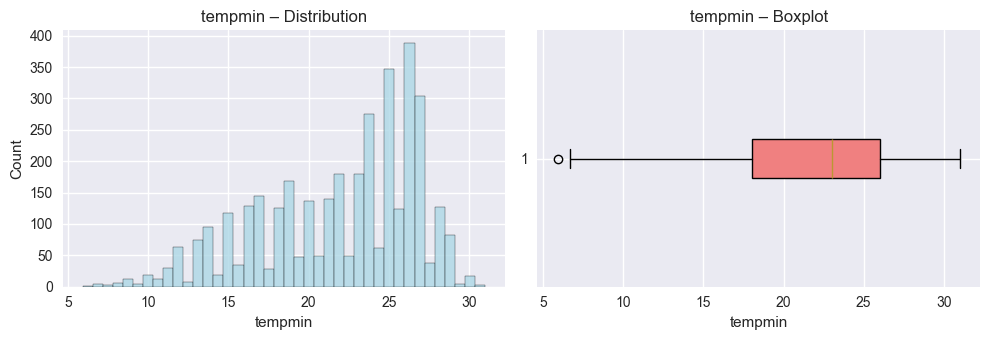

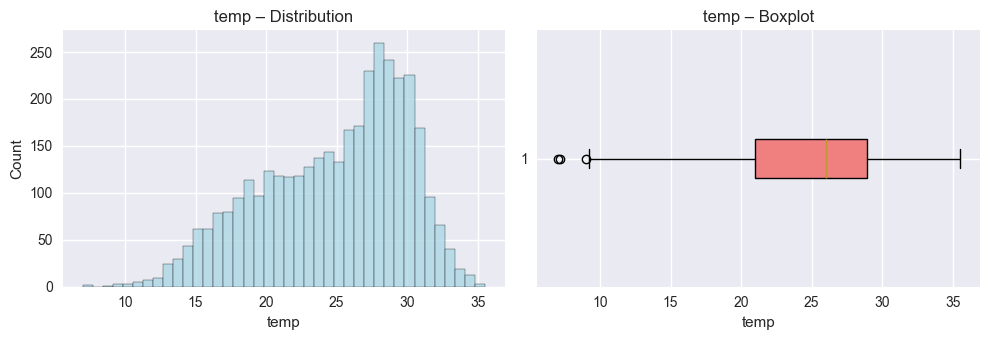

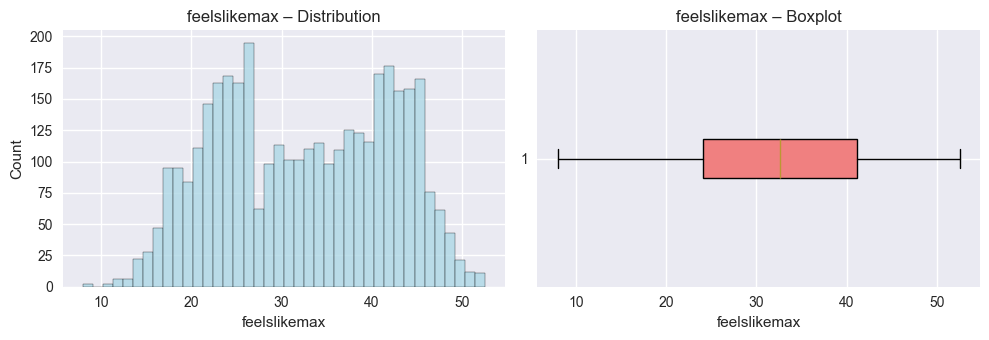

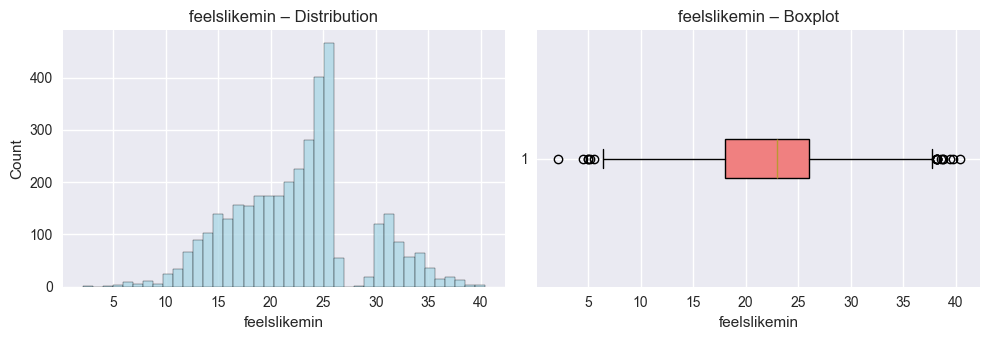

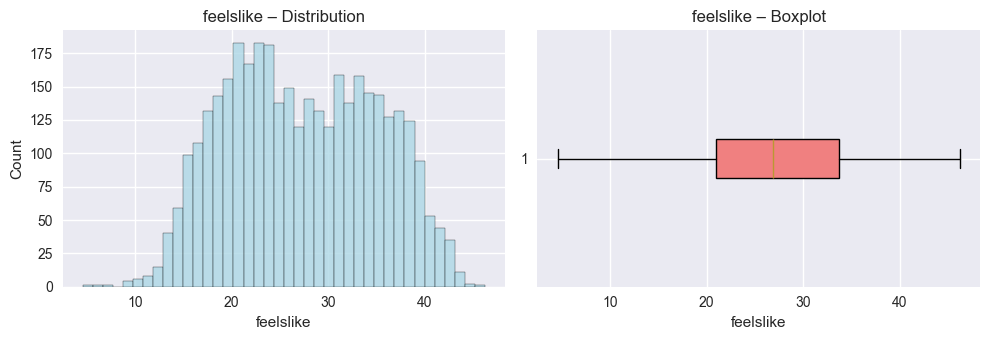

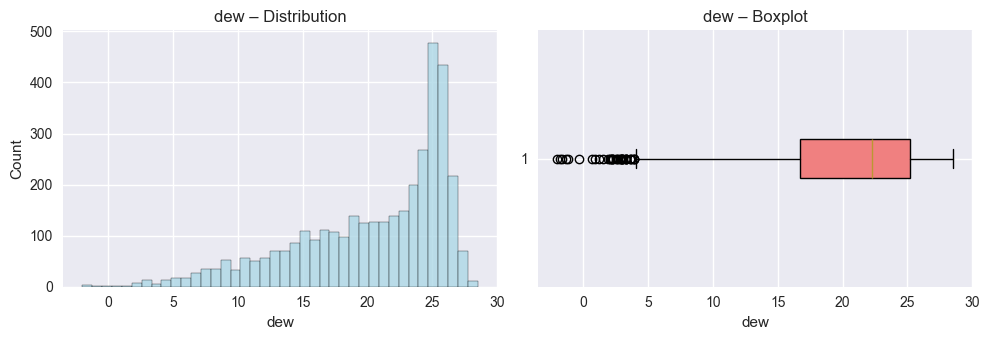

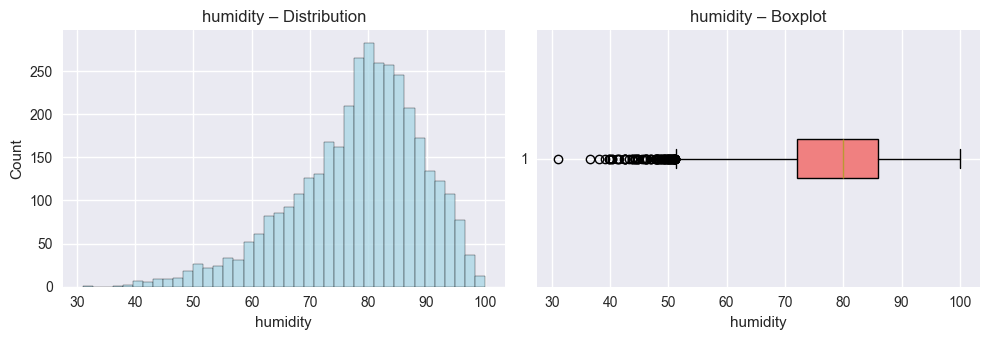

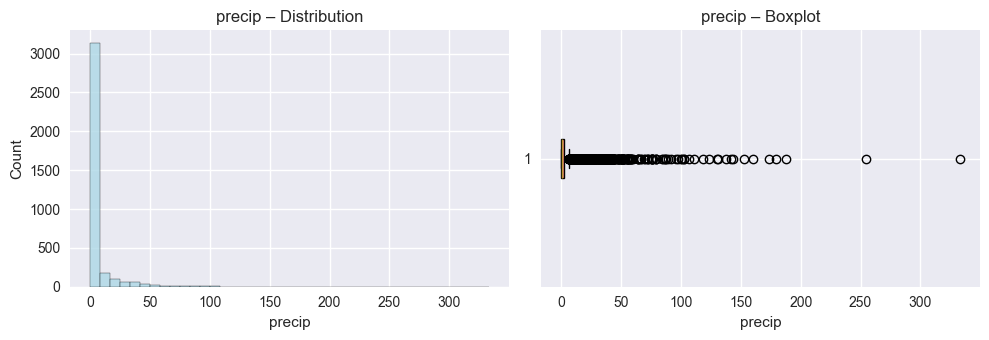

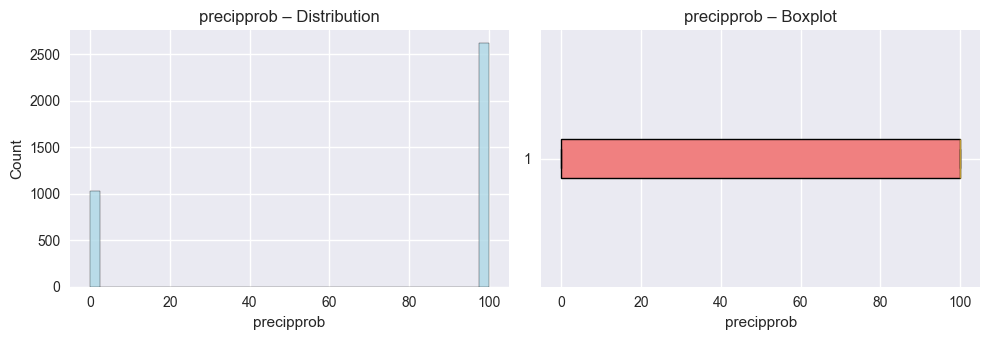

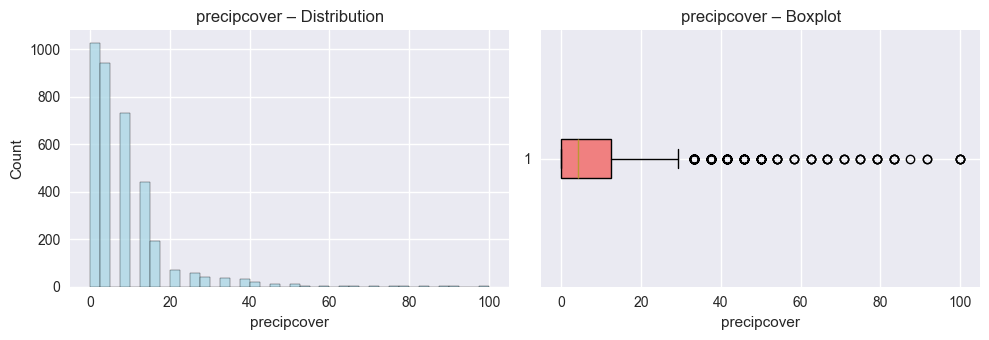

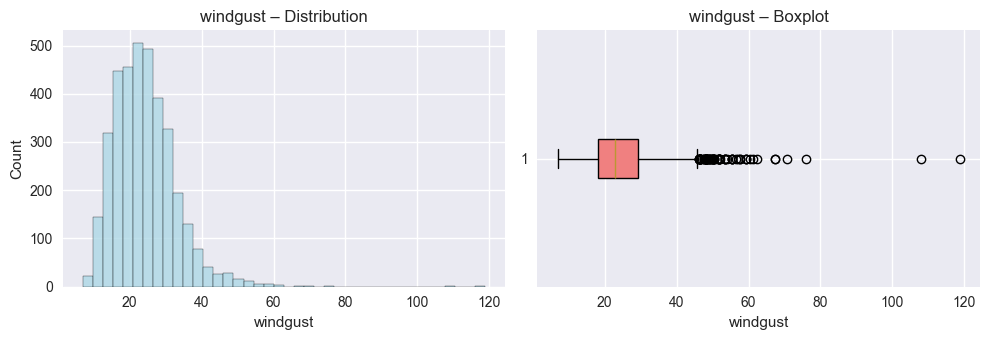

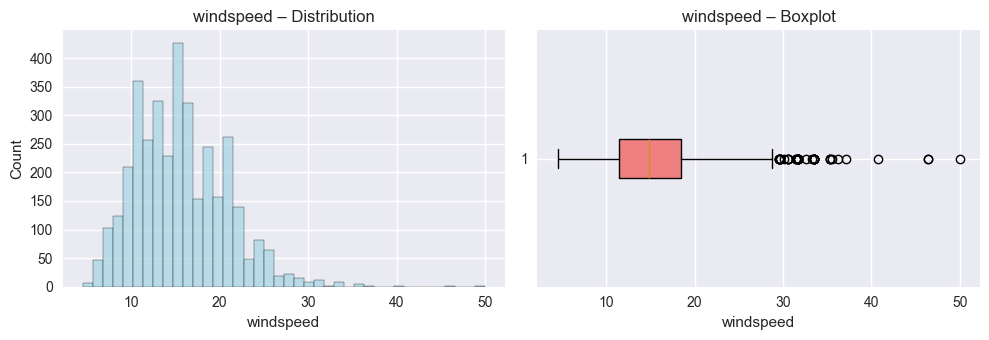

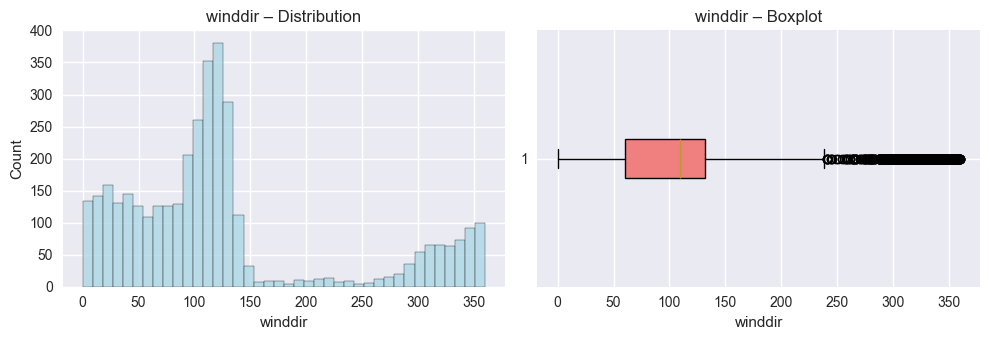

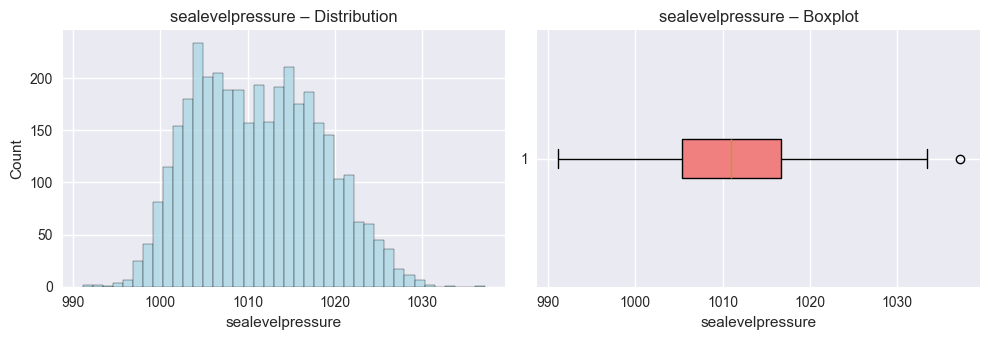

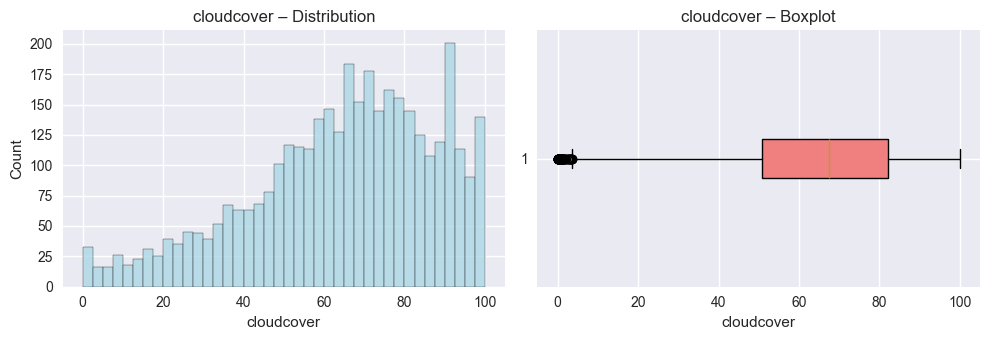

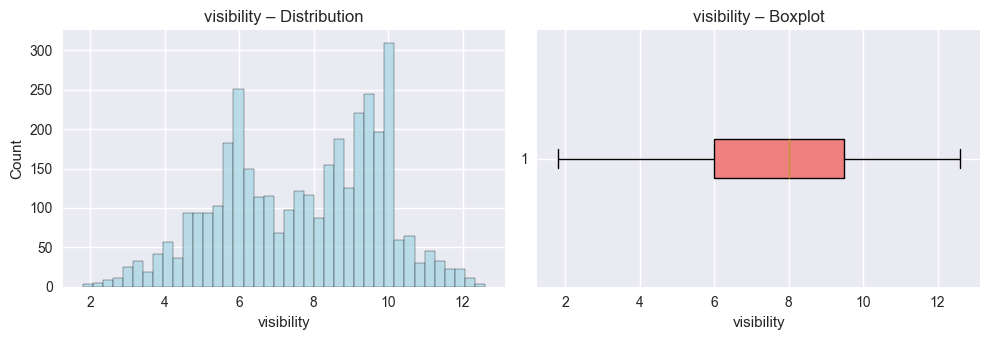

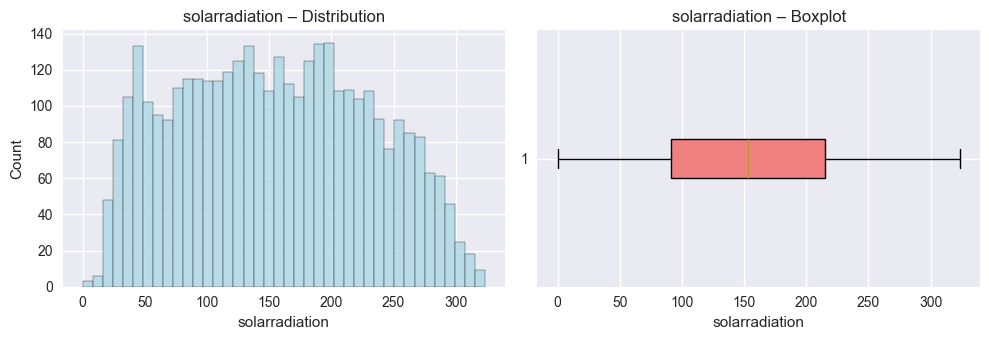

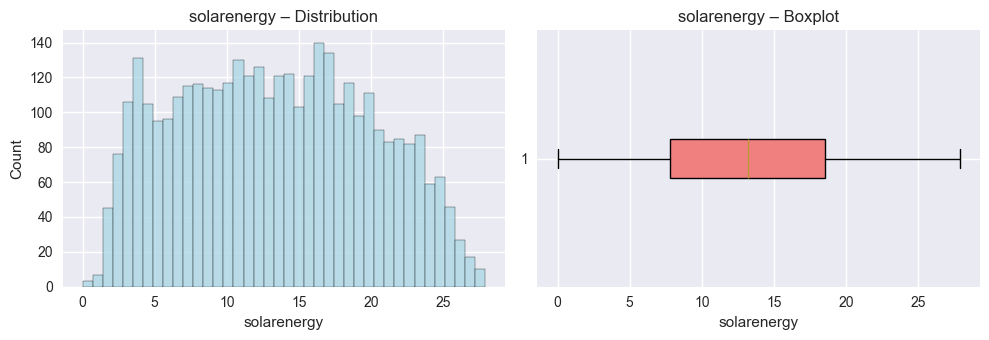

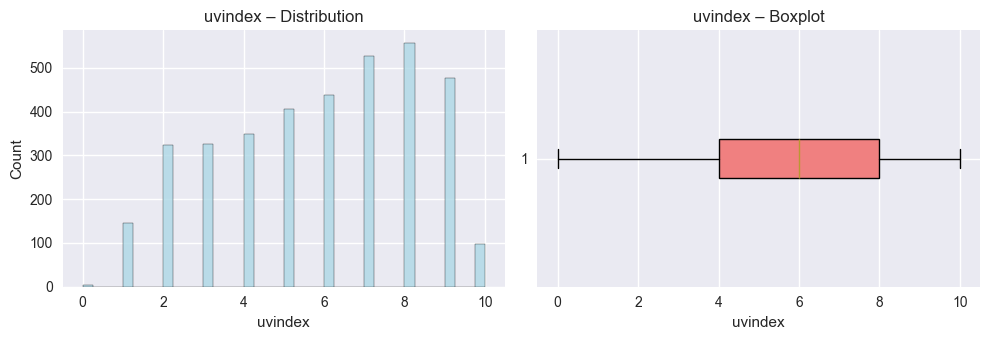

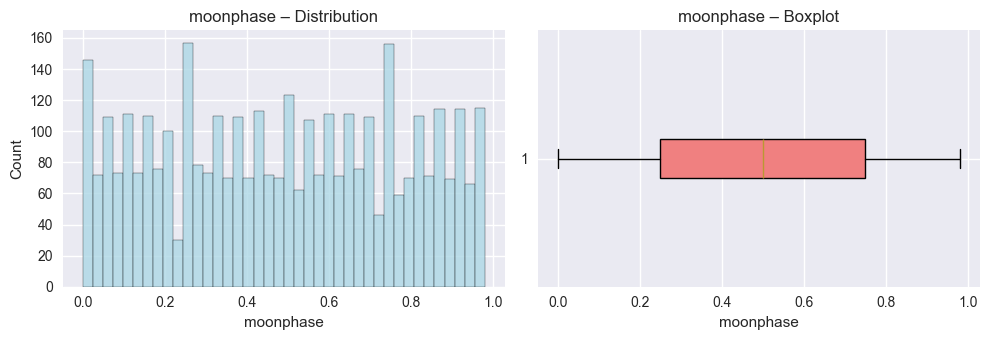

In [476]:
# === Numeric: Histogram + Boxplot ===
for col in numeric_cols:
    data = df[col].dropna()
    if data.empty: continue
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
    
    ax1.hist(data, bins=40, color='lightblue', edgecolor='black', alpha=0.8)
    ax1.set(title=f'{col} – Distribution', xlabel=col, ylabel='Count')
    
    ax2.boxplot(data, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightcoral'))
    ax2.set(title=f'{col} – Boxplot', xlabel=col)
    
    plt.tight_layout()
    plt.show()


1. Handling Skewness & Sparsity

- Most non-temperature variables are non-normal: binary, sparse, or bounded.

- Use domain-aware encoding rather than standard normalization.

2. Outliers

- Extreme cold values exist; extreme heat (>40°C) does not.

- Models should be designed without expecting unusually high temperatures.

3. Weather Persistence (“Stickiness”)

- High humidity, high cloud cover, and moderate temperatures are common.

- Models should favor persistence, e.g., today’s temperature is often a strong predictor of tomorrow’s, unless there are strong signals like a pressure drop or high solar radiation.

## **4. Correlation & Feature Interaction**

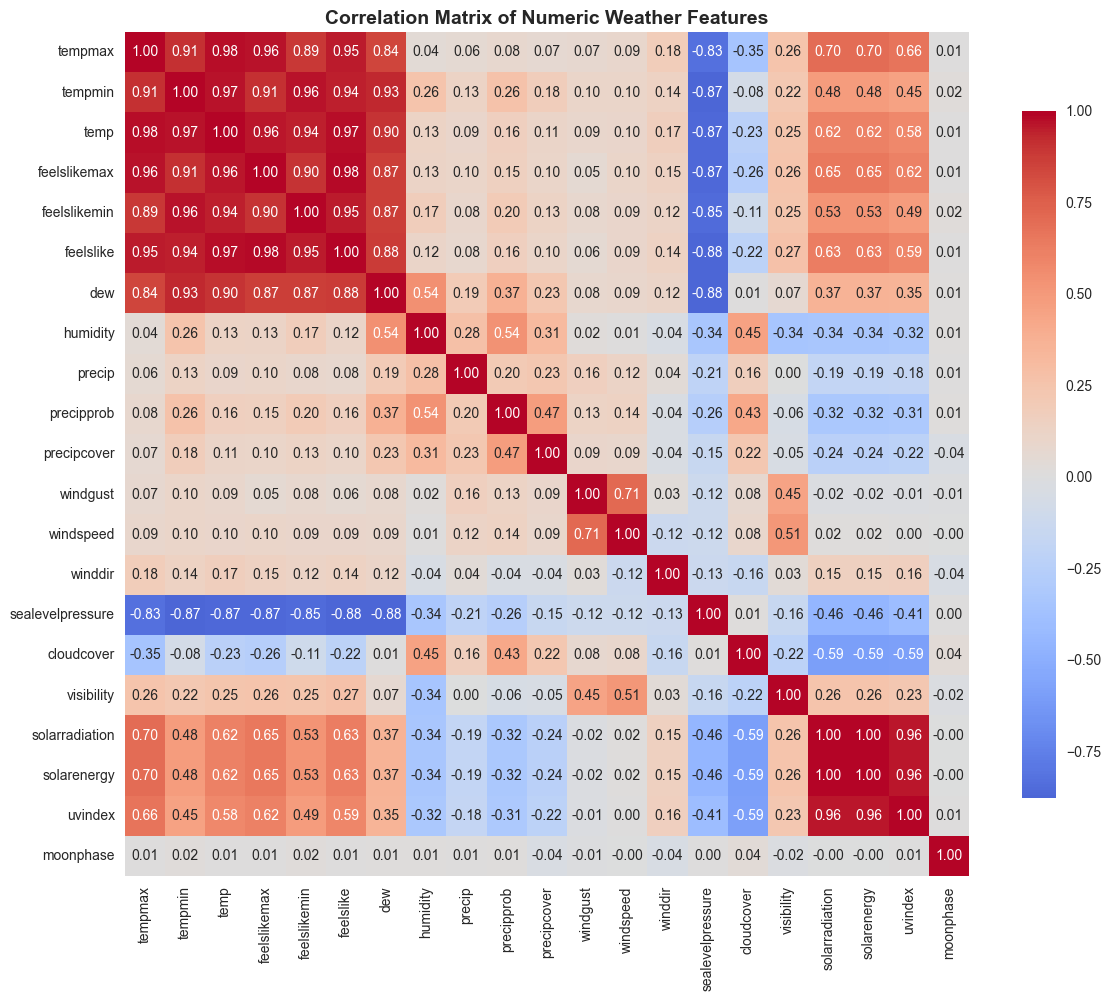

TEMPERATURE CORRELATIONS (sorted by absolute value):
temp                 1.00
tempmax              0.98
feelslike            0.97
tempmin              0.97
feelslikemax         0.96
feelslikemin         0.94
dew                  0.90
sealevelpressure    -0.87
solarradiation       0.62
solarenergy          0.62
uvindex              0.58
visibility           0.25
cloudcover          -0.23
winddir              0.17
precipprob           0.16
humidity             0.13
precipcover          0.11
windspeed            0.10
precip               0.09
windgust             0.09
moonphase            0.01
Name: temp, dtype: object


In [477]:
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Matrix of Numeric Weather Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Temperature correlations specifically
temp_corr_abs_sorted = corr_matrix['temp'].reindex(
    corr_matrix['temp'].abs().sort_values(ascending=False).index
)

print("TEMPERATURE CORRELATIONS (sorted by absolute value):")
print(temp_corr_abs_sorted.apply(lambda x: f"{x:.2f}"))


High multicollinearity between:

- temp, tempmax, tempmin, feelslike, feelslikemax, dew
- solarradiation & solarenergy
- sealevelpressure & cloudcover (both relate to weather systems)

Solution:

- Use feature selection (e.g., Lasso, RFE) to pick the most predictive subset.
- Or, keep one from each group: e.g., temp, dew, sealevelpressure, solarradiation, cloudcover.

Recommendation:

- Drop These (Low Signal, High Noise):
['humidity', 'windspeed', 'precip', 'windgust', 'moonphase', 'solarenergy']

Consider:

- Lagged features: temp_t-1, dew_t-1, pressure_t-1

### **5. Target Analysis**

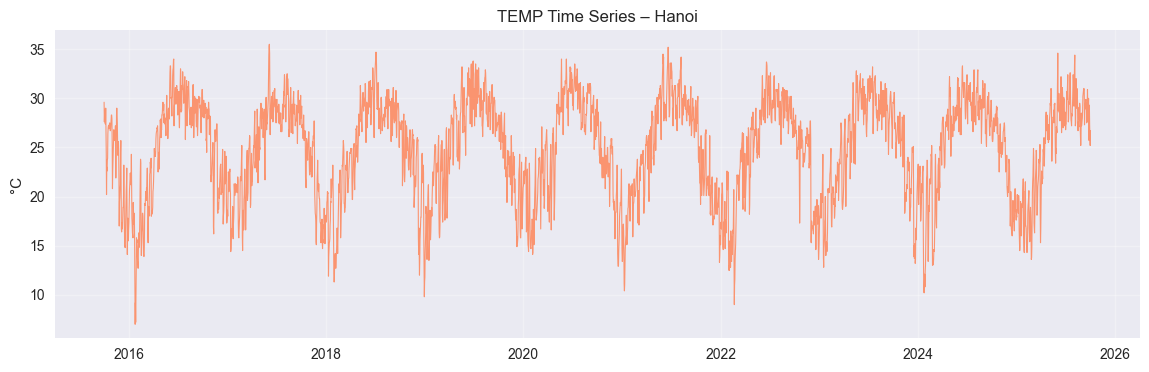

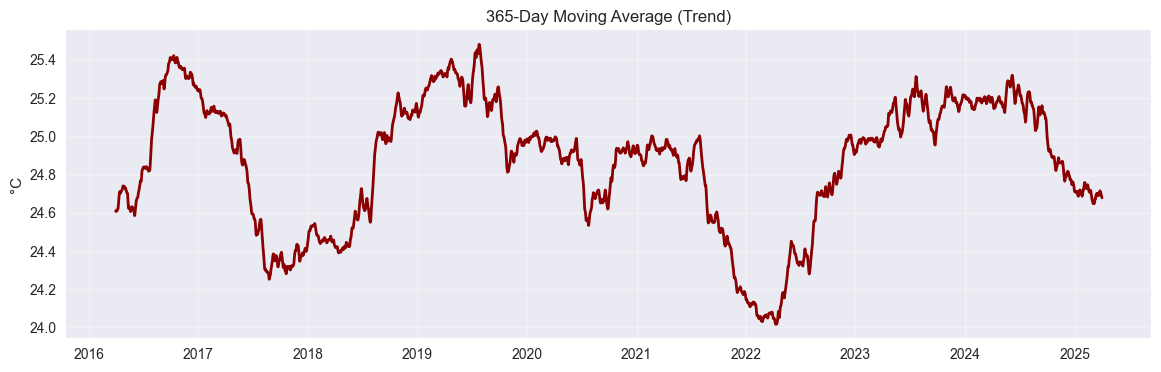

In [478]:
# Time series
plt.figure(figsize=(14, 4))
plt.plot(df['datetime'], df['temp'], color='coral', lw=0.8, alpha=0.8)
plt.title(f"{'temp'.upper()} Time Series – Hanoi")
plt.ylabel("°C")
plt.grid(alpha=0.3)
plt.show()

# Rolling 365-day avg
df['temp_365'] = df['temp'].rolling(365, center=True).mean()
plt.figure(figsize=(14, 4))
plt.plot(df['datetime'], df['temp_365'], color='darkred', lw=2)
plt.title("365-Day Moving Average (Trend)")
plt.ylabel("°C")
plt.grid(alpha=0.3)
plt.show()

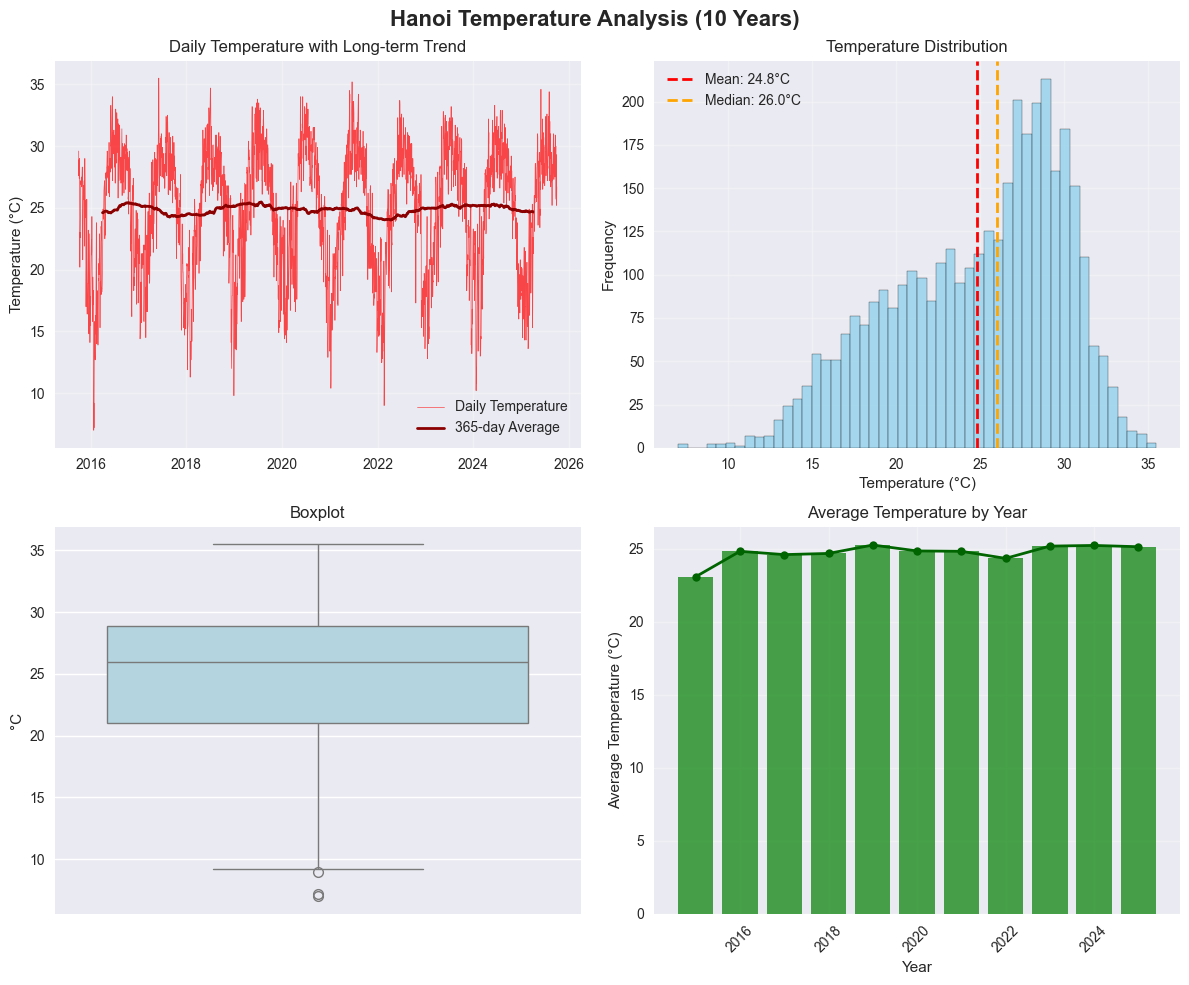

HANOI TEMPERATURE STATISTICS:
Average Temperature: 24.83°C
Median Temperature:  26.00°C
Standard Deviation:  5.11°C
Minimum Temperature: 7.00°C
Maximum Temperature: 35.50°C
Temperature Range:   28.50°C


In [479]:
# Enhanced temperature analysis with rolling averages and detailed insights
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear
df['temp_range'] = df['tempmax'] - df['tempmin']

# Weather visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Hanoi Temperature Analysis (10 Years)", fontsize=16, fontweight='bold')

# 1. Temperature time series
axes[0, 0].plot(df['datetime'], df['temp'], alpha=0.7, color='red', linewidth=0.5, label='Daily Temperature')
df['temp_rolling_365'] = df['temp'].rolling(window=365, center=True).mean()
axes[0, 0].plot(df['datetime'], df['temp_rolling_365'], color='darkred', linewidth=2, label='365-day Average')
axes[0, 0].set_title('Daily Temperature with Long-term Trend')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Temperature distribution with statistics
axes[0, 1].hist(df['temp'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].axvline(df['temp'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["temp"].mean():.1f}°C')
axes[0, 1].axvline(df['temp'].median(), color='orange', linestyle='--', linewidth=2, 
                   label=f'Median: {df["temp"].median():.1f}°C')
axes[0, 1].set_title('Temperature Distribution')
axes[0, 1].set_xlabel('Temperature (°C)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot
sns.boxplot(y=df['temp'], ax=axes[1,0], color='lightblue')
axes[1,0].set(title="Boxplot", ylabel="°C")

# 4. Yearly temperature trends
yearly_temp = df.groupby('year')['temp'].mean()
axes[1, 1].bar(yearly_temp.index, yearly_temp.values, alpha=0.7, color='green')
axes[1, 1].plot(yearly_temp.index, yearly_temp.values, color='darkgreen', marker='o', 
                linewidth=2, markersize=6)
axes[1, 1].set_title('Average Temperature by Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Temperature (°C)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("HANOI TEMPERATURE STATISTICS:")
print(f"Average Temperature: {df['temp'].mean():.2f}°C")
print(f"Median Temperature:  {df['temp'].median():.2f}°C")
print(f"Standard Deviation:  {df['temp'].std():.2f}°C")
print(f"Minimum Temperature: {df['temp'].min():.2f}°C")
print(f"Maximum Temperature: {df['temp'].max():.2f}°C")
print(f"Temperature Range:   {df['temp'].max() - df['temp'].min():.2f}°C")


Overall:
Hanoi’s temperature follows a strong annual cycle with clear peaks in summer (~30–35°C) and dips in winter (~10–15°C). There’s no significant long-term warming trend over 10 years — average temp hovers around 24.8°C. The data is highly seasonal, making lagged features and calendar-based features critical for accurate short-term prediction. 

Key Findings:
1. Strong Seasonality (Annual Cycle)
- Pattern: Peaks every year ~May–Aug (summer), troughs ~Dec–Feb (winter)
- Amplitude: ~20°C swing between min and max

Recommendation
- Add month-of-year or day-of-year as categorical features
- Consider Fourier terms (sin/cos of day-of-year) to capture smooth seasonality

2. High Daily Volatility
- Daily temps swing wildly within each season (e.g., from 20°C to 35°C in summer)
- Boxplot shows IQR ~22–29°C, with outliers down to 8°C and up to 35°C

Recommendation
- Include lagged daily values (temp_t-1, temp_t-2, ..., temp_t-7) — strong autocorrelation expected
- Add rolling stats (e.g., 7-day mean/max/min) to capture short-term momentum
4. Yearly Average Stability
Average temp per year is remarkably stable — all between 24.5°C and 25.5°C

Recommendation
- Year-level features are not predictive for short-term (5-day) forecast
- Focus on within-year patterns, not inter-year trends

## **6. Time Series and Trend**

### 6.1. Seasonal Patterns (Month & Season)

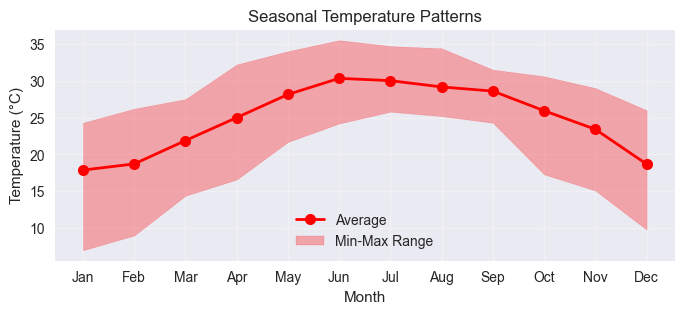

In [480]:
fig, ax = plt.subplots(figsize=(8, 3))

monthly_temp = df.groupby('month')['temp'].agg(['mean', 'min', 'max'])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.plot(monthly_temp.index, monthly_temp['mean'], marker='o', linewidth=2, 
                markersize=8, color='red', label='Average')
ax.fill_between(monthly_temp.index, monthly_temp['min'], monthly_temp['max'], 
                        alpha=0.3, color='red', label='Min-Max Range')
ax.set_title('Seasonal Temperature Patterns')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

In [481]:
print("\nSeasonal Temperature Averages:")
seasons = {
    'Winter (Dec-Feb)': [12, 1, 2],
    'Spring (Mar-May)': [3, 4, 5],
    'Summer (Jun-Aug)': [6, 7, 8],
    'Autumn (Sep-Nov)': [9, 10, 11]
}

for season, months in seasons.items():
    season_temp = df[df['month'].isin(months)]['temp'].mean()
    print(f"{season}: {season_temp:.2f}°C")


Seasonal Temperature Averages:
Winter (Dec-Feb): 18.42°C
Spring (Mar-May): 25.01°C
Summer (Jun-Aug): 29.83°C
Autumn (Sep-Nov): 25.98°C


### 6.2. Features vs Temp through time

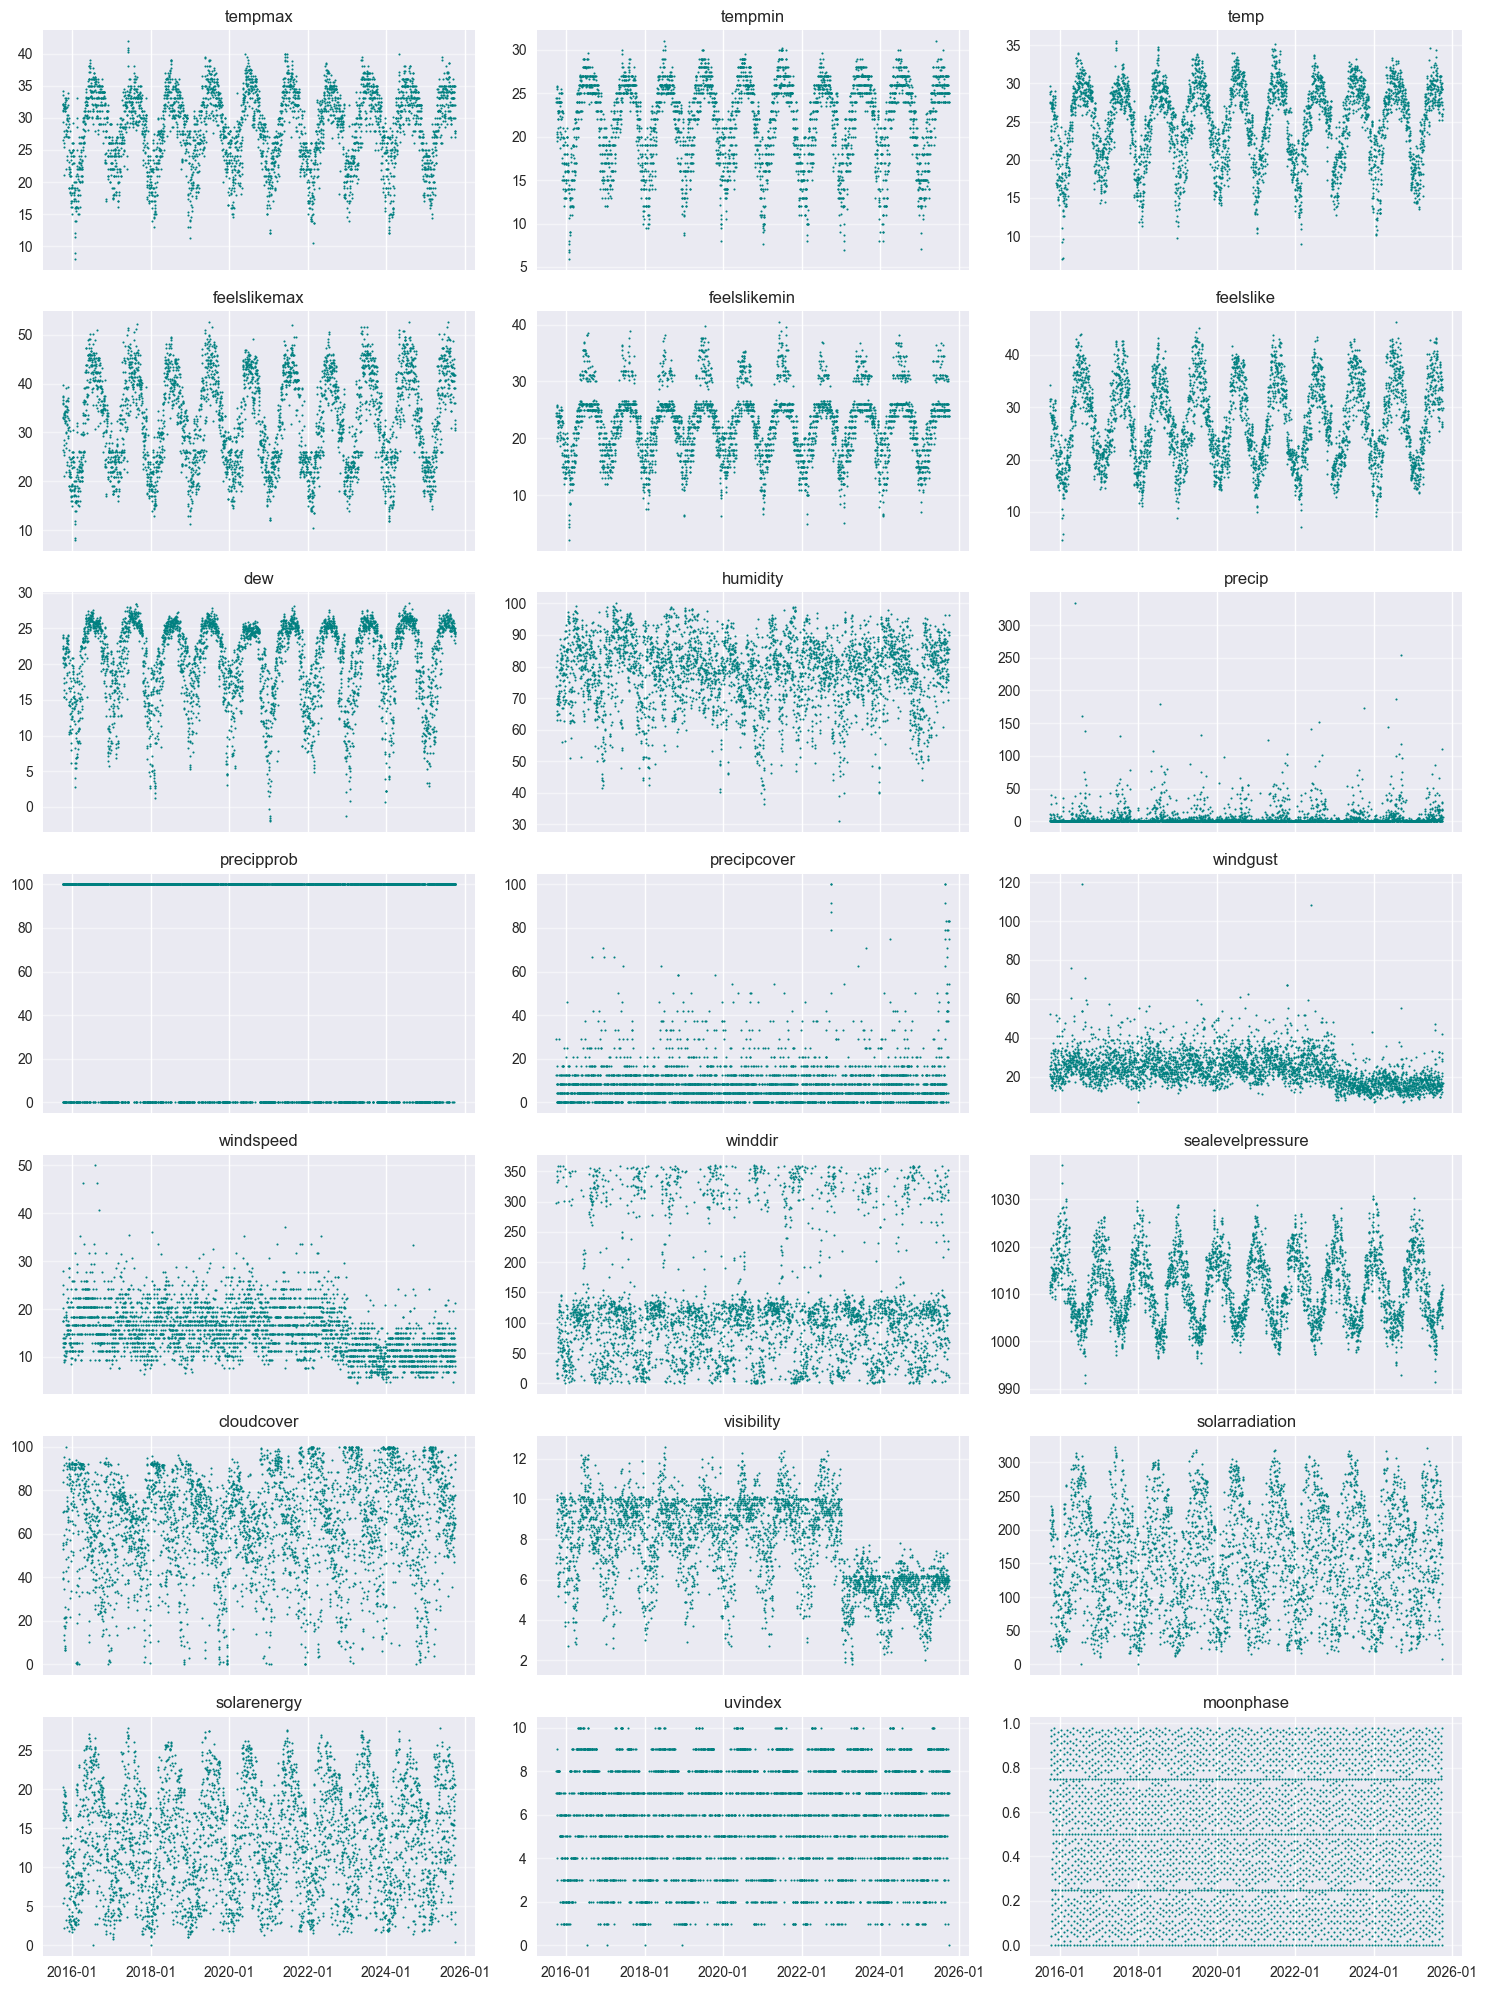

In [482]:
if 'datetime' in df.columns:
    ts = df.set_index('datetime')
else:
    ts = df.copy()
ts.index = pd.to_datetime(ts.index)

# --- Plot 3 per row ---
cols = [c for c in numeric_cols if c in ts.columns]
n = len(cols)

fig, axes = plt.subplots(7, 3, 
                         figsize=(15, 20), 
                         sharex=True)

axes = axes.flatten() if n > 1 else [axes]

for i, col in enumerate(cols):
    ax = axes[i]
    ax.plot(ts.index, ts[col], '.', ms=3, lw=0.6, color='teal')
    ax.set_title(col)
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax.grid(True, axis='y', alpha=0.5)

# Hide empty subplots
for i in range(n, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

**Seasonal Range Reflects Atmospheric Stability**

The shaded area in the plot shows the min-max range per month, which widens in summer and narrows in winter.
Summer has both higher highs and higher lows, less diurnal swing, more persistent heat.
Winter has wider spread, more volatility between day and night, or between warm/cold spells.

Takeaway for Forecasting:

This reinforces the value of:

- Seasonal context features (not just calendar dates, but smooth, cyclical representations)
- Anomaly detection (is today unusually warm for March?)
- Interaction terms (e.g., solar radiation × cloud cover) to capture how physical drivers behave differently across seasons


## **7. Advanced Features**

### 7.1. Sequential Features
It is recommended to transform these variables because they have a sequential nature.

Weather is seasonal: temperatures, precipitation, and daylight vary over the year.
Cyclical encoding preserves continuity between December and January.
Helps the model learn annual trends instead of treating months as unrelated numbers.

In [483]:
# Temporal Features
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_year'] = df['datetime'].dt.dayofyear



# Season mapping
season_map = {12: 'Winter', 1: 'Winter', 2: 'Winter',
            3: 'Spring', 4: 'Spring', 5: 'Spring',
            6: 'Summer', 7: 'Summer', 8: 'Summer',
            9: 'Autumn', 10: 'Autumn', 11: 'Autumn'}
df['season'] = df['month'].map(season_map)

# Cyclical encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['dayofyear_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['dayofyear_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)

Longer days generally lead to higher temperatures or more solar energy absorption. Interaction features reveal how temperature reacts to sunlight intensity and cloud cover. Can explain day-to-day variation in temperature beyond raw temp readings.

In [484]:
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['sunset'] = pd.to_datetime(df['sunset'])
df['sunrise'] = pd.to_datetime(df['sunrise'])
df['day_length_hours'] = (df['sunset'] - df['sunrise']).dt.total_seconds() / 3600
df['temp_solar_interaction'] = df['temp'] * df['solarradiation']
df['effective_solar'] = df['solarradiation'] * (1 - df['cloudcover'] / 100)

Combines probability and intensity of precipitation into a single predictive measure.
Highlights days with significant rain or snow impact, even if raw precipitation is small.
Useful for forecasting temperature changes, humidity, or event-related anomalies.

In [485]:
df['weighted_precip'] = df['precipprob'] * df['precip']
df['precip_impact'] = df['precipprob'] * df['precip']

Splitting wind into directional components reveals which direction the wind comes from and its effect.
Pressure trends capture short-term weather shifts (e.g., approaching storms).
Important for modeling rapid temperature or weather changes.

In [486]:
df['wind_u'] = df['windspeed'] * np.cos(2 * np.pi * df['winddir'] / 360)
df['wind_v'] = df['windspeed'] * np.sin(2 * np.pi * df['winddir'] / 360)
df['pressure_trend_3d'] = df['sealevelpressure'] - df['sealevelpressure'].shift(3)
df['pressure_trend_7d'] = df['sealevelpressure'] - df['sealevelpressure'].shift(7)

Moon phase can affect nighttime temperatures or radiation balance.
Mostly relevant if you want fine-grained night/day effects or tidal/weather interactions.

In [487]:
df['moonphase_sin'] = np.sin(2 * np.pi * df['moonphase'])
df['moonphase_cos'] = np.cos(2 * np.pi * df['moonphase'])

### 7.2. Interaction Features
    

Weather variables rarely act independently.
Interaction terms allow the model to capture non-linear effects, e.g., high UV only raises temperature on clear days.

In [488]:
df['uv_temp_interaction'] = df['uvindex'] * df['temp']
df['temp_cloudcover_interaction'] = df['temp'] * df['cloudcover']
df['temp_sealevelpressure_interaction'] = df['temp'] * df['sealevelpressure']

### 7.3. Lag & Rolling Features

Weather depends on recent history, not just the current day.
Lag features capture autocorrelation in temperature, pressure, and humidity.
Rolling statistics detect volatility, spikes, or anomalies relative to short-term trends.

In [489]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
lag_steps = [1, 2, 3, 5, 7, 10, 14, 21, 30]

for col in numeric_cols:
    for lag in lag_steps:
        df[f"{col}_lag_{lag}"] = df[col].shift(lag)

rolling_windows = [3, 7, 14, 21, 30]
for col in numeric_cols:
    for window in rolling_windows:
        df[f"{col}_rolling_mean_{window}"] = df[col].rolling(window).mean()
        df[f"{col}_rolling_std_{window}"] = df[col].rolling(window).std()

# Temperature-specific advanced features
df['temp_spike_flag'] = (df['temp'] - df['temp'].shift(1)).abs() > 5
df['temp_anomaly_vs_month_avg'] = df['temp'] - df.groupby(df['month'])['temp'].transform('mean')
df['temp_anomaly_vs_season_avg'] = df['temp'] - df.groupby(df['season'])['temp'].transform('mean')


### 7.4. Aggregation Features


Encodes historical context for each feature.
Shows whether a day is hotter/colder than usual for its month or season.
Useful for detecting anomalies and season-adjusted trends.

In [490]:
for col in numeric_cols:
    df[f"month_avg_{col}"] = df.groupby(df['month'])[col].transform('mean')
    df[f"season_avg_{col}"] = df.groupby(df['season'])[col].transform('mean')
    df[f"year_avg_{col}"] = df.groupby(df['year'])[col].transform('mean')
